# Cell normalization with imputation

In [73]:
library(glue)

In [74]:
exp_label = "cellNorm_imp"

In [75]:
input_matrix_name = "../../output/preprocessing_59/FC_log2_hMinImp_cellNorm_groupFil0.3_HILICpos_featab.csv"
meta_data_name = "../../input/sequence_file/clean_meta_df.csv"

In [76]:
df = read.table(input_matrix_name, header = TRUE,sep = ',',row.name = 1)
meta_df = read.table(meta_data_name, header = TRUE, sep = ',')

In [77]:
rn = sample(1:100, 1)
output_dir <- glue("../../output/PCA/cellNorm_wtImp_{rn}")
dir.create(output_dir)

In [78]:
# since the meta_df originally have techincal replicates, which is not unique after technical replicate summaries
# Thus processing metadata a little bit to retain only relevant rows
sub_meta_df <- meta_df[c('tID_dedup','class','biological_samples','cell_number')]
sub_meta_df <- unique(sub_meta_df)

rownames(sub_meta_df) = sub_meta_df$tID_dedup

In [79]:
data.df = df[,grep('R5pos\\_[0-9]+|R5neg\\_[0-9]+|Naive\\_[0-9]+',colnames(df))]

In [80]:
head(data.df)

,Naive_1,Naive_2,Naive_3,R5neg_1,R5neg_2,R5neg_3,R5pos_1,R5pos_2,R5pos_3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F1,14.75765,16.52419,16.44929,15.64991,15.73690,15.31941,13.75765,16.00143,15.45488
F4,24.10493,24.49154,24.48754,24.05209,23.70601,23.78458,24.68858,24.46352,25.09372
F20,17.00745,18.76444,16.20722,16.79299,16.85493,15.72596,17.42967,17.73866,18.38234
F24,16.12436,16.08670,18.13540,17.13822,16.62651,16.88263,15.08670,15.08670,18.52375
F25,20.59751,21.55389,21.37772,21.19551,20.78962,20.86488,14.39953,20.93304,21.42396
F51,20.22740,21.12595,20.61648,18.58685,19.01424,18.37086,17.37086,20.56868,20.84863


In [81]:
if(any(data.df > 10000)) {
    data.df[data.df == 0] = NA
    data.df.log2 = log2(data.df)
} else {
    data.df.log2 = data.df
}

In [82]:
head(data.df.log2)

,Naive_1,Naive_2,Naive_3,R5neg_1,R5neg_2,R5neg_3,R5pos_1,R5pos_2,R5pos_3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F1,14.75765,16.52419,16.44929,15.64991,15.73690,15.31941,13.75765,16.00143,15.45488
F4,24.10493,24.49154,24.48754,24.05209,23.70601,23.78458,24.68858,24.46352,25.09372
F20,17.00745,18.76444,16.20722,16.79299,16.85493,15.72596,17.42967,17.73866,18.38234
F24,16.12436,16.08670,18.13540,17.13822,16.62651,16.88263,15.08670,15.08670,18.52375
F25,20.59751,21.55389,21.37772,21.19551,20.78962,20.86488,14.39953,20.93304,21.42396
F51,20.22740,21.12595,20.61648,18.58685,19.01424,18.37086,17.37086,20.56868,20.84863


In [83]:
sub_meta_df = sub_meta_df[colnames(data.df.log2),]

In [84]:
sub_meta_df

,tID_dedup,class,biological_samples,cell_number
,<chr>,<chr>,<chr>,<int>
Naive_1,Naive_1,Naive,Yes,300
Naive_2,Naive_2,Naive,Yes,300
Naive_3,Naive_3,Naive,Yes,300
R5neg_1,R5neg_1,R5neg,Yes,655
R5neg_2,R5neg_2,R5neg,Yes,687
R5neg_3,R5neg_3,R5neg,Yes,865
R5pos_1,R5pos_1,R5pos,Yes,142
R5pos_2,R5pos_2,R5pos,Yes,200
R5pos_3,R5pos_3,R5pos,Yes,150


In [85]:
library(stringr)
ordered_group_v = str_extract(colnames(data.df.log2),'Naive|R5neg|R5pos')

In [86]:
color_v = c('Naive' = "#888888", 'R5neg' = "#ff0000",'R5pos' = '#0000ff')[ordered_group_v]

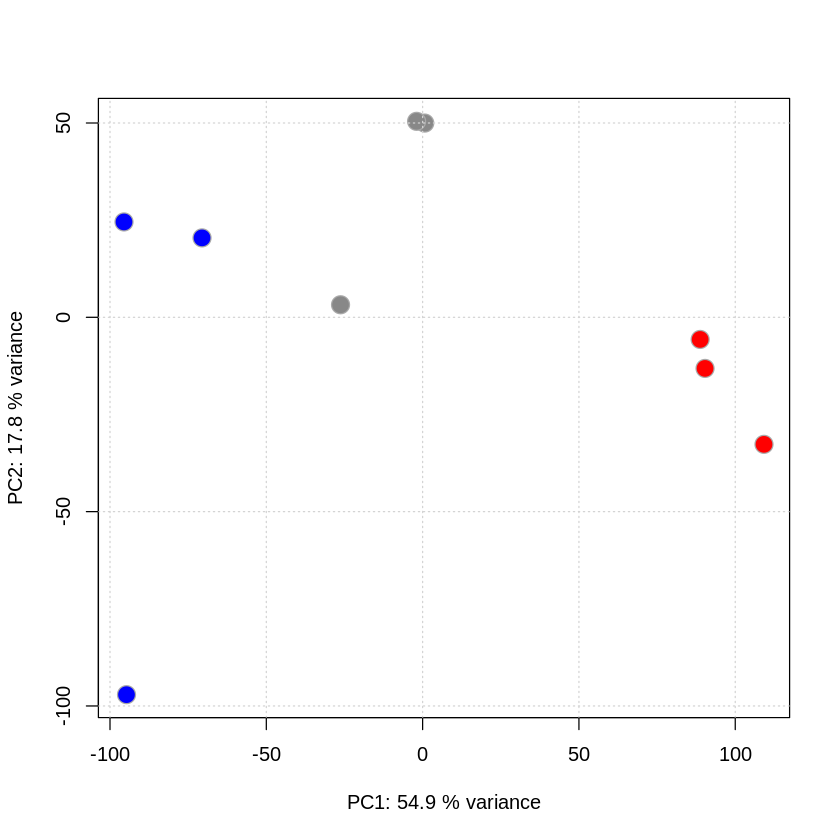

In [87]:
#' Perform the PCA omitting all features with an NA in any of the
pc <- prcomp(t(na.omit(data.df.log2)), center = TRUE) 

#' Plot the PCA
pcSummary <- summary(pc)
plot(pc$x[, 1], pc$x[,2], pch = 21, main = "",
     xlab = paste0("PC1: ", format(pcSummary$importance[2, 1] * 100,
                                   digits = 3), " % variance"),
     ylab = paste0("PC2: ", format(pcSummary$importance[2, 2] * 100,
                                   digits = 3), " % variance"),
     col = "darkgrey", bg = color_v, cex = 2)
     grid()
    # text(pc$x[, 1], pc$x[,2],  col = "darkgrey", labels = colnames(data.df.log2)
    # pos = 3, cex = 2)

In [88]:
# print the pdf
pdf(file.path(output_dir,glue("{exp_label}_PCA_no_labels.pdf")))
#' Perform the PCA omitting all features with an NA in any of the
pc <- prcomp(t(na.omit(data.df.log2)), center = TRUE) 

#' Plot the PCA
pcSummary <- summary(pc)
plot(pc$x[, 1], pc$x[,2], pch = 21, main = "",
     xlab = paste0("PC1: ", format(pcSummary$importance[2, 1] * 100,
                                   digits = 3), " % variance"),
     ylab = paste0("PC2: ", format(pcSummary$importance[2, 2] * 100,
                                   digits = 3), " % variance"),
     col = "darkgrey", bg = color_v, cex = 2)
     grid()
    # text(pc$x[, 1], pc$x[,2],  col = "darkgrey", labels = colnames(data.df.log2)

dev.off()

png 
  2

-----